# Honey Production
___

The Honey Production dataset contains information on honey production in the United States from 1998 to 2012. It was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. More information can be found about it [here](https://www.kaggle.com/jessicali9530/honey-production).

The dataset contains 8 columns:
* **State** - The name of the state.
* **numcol** - The number of honey producing colonies.
* **yieldpercol** - The amount of honey produced per colony in pounds.
* **totalprod** - The total amount of honey produced that year.
* **stocks** - Stocks held by producers.
* **priceperlb** - Price per pound of honey, in USD.
* **prodvalue** - totalprod * priceperlb
* **year** - The year the data was recorded.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [11]:
df = pd.read_csv("honeyproduction.csv")

In [12]:
df.shape

(626, 8)

In [13]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [17]:
df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [ ]:
['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'year']

In [14]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [18]:
df.isnull().values.any()

False

# Data Exploration

Let's take a look at how some of the variables are distributed.

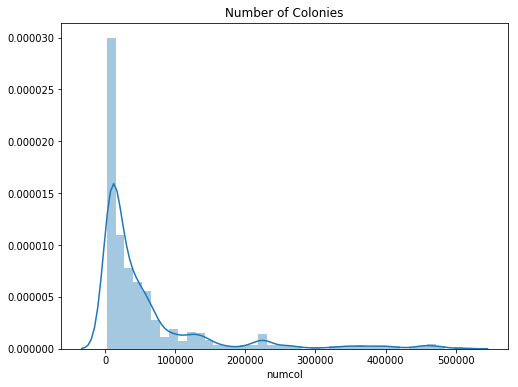

In [20]:
plt.figure(figsize=(8,6))

sns.distplot(df['numcol'])
plt.title('Number of Colonies')

plt.show()

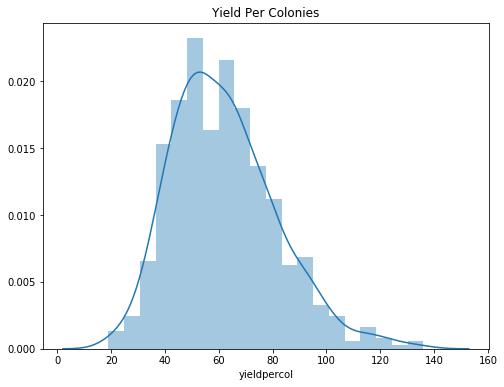

In [23]:
plt.figure(figsize=(8,6))

sns.distplot(df['yieldpercol'])
plt.title('Yield Per Colonies')

plt.show()

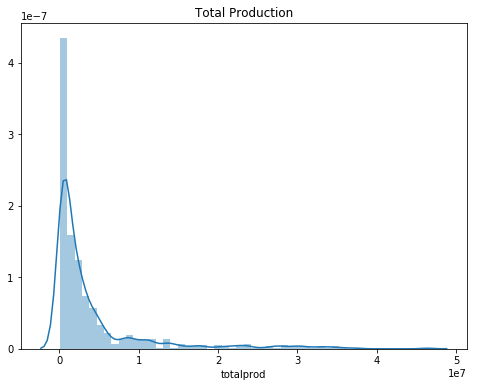

In [24]:
plt.figure(figsize=(8,6))

sns.distplot(df['totalprod'])
plt.title('Total Production')

plt.show()

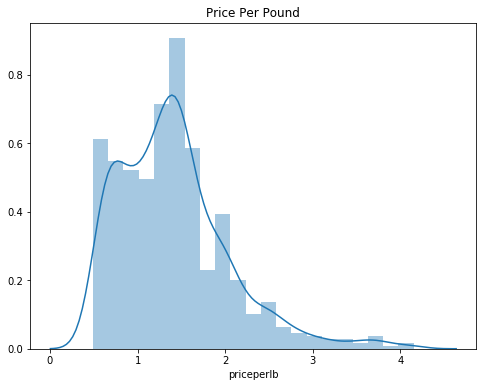

In [26]:
plt.figure(figsize=(8,6))

sns.distplot(df['priceperlb'])
plt.title('Price Per Pound')

plt.show()

#### Let's see how some of the variables have changed over time.

In [32]:
df_by_year = df.groupby('year').mean()

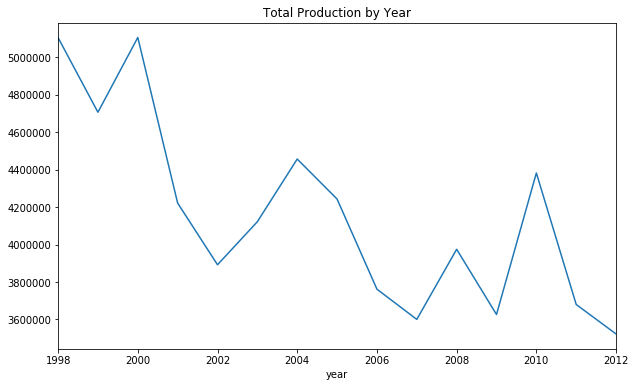

In [42]:
plt.figure(figsize=(10,6))
df_by_year['totalprod'].plot()
plt.title('Total Production by Year')

plt.show()

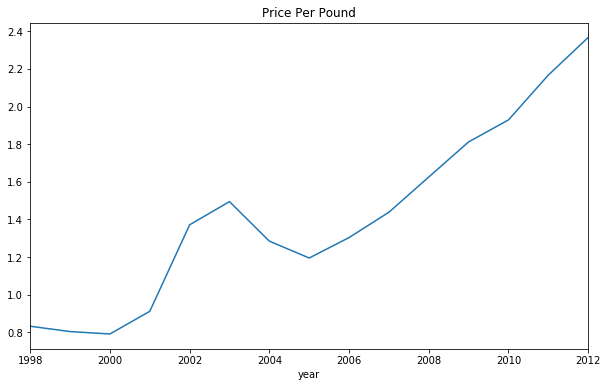

In [45]:
plt.figure(figsize=(10,6))
df_by_year['priceperlb'].plot()
plt.title('Price Per Pound')

plt.show()

##### Wow, total honey production has declined over time, and the price per pund has gone way up. 

#### Let's see how the different variables are related.

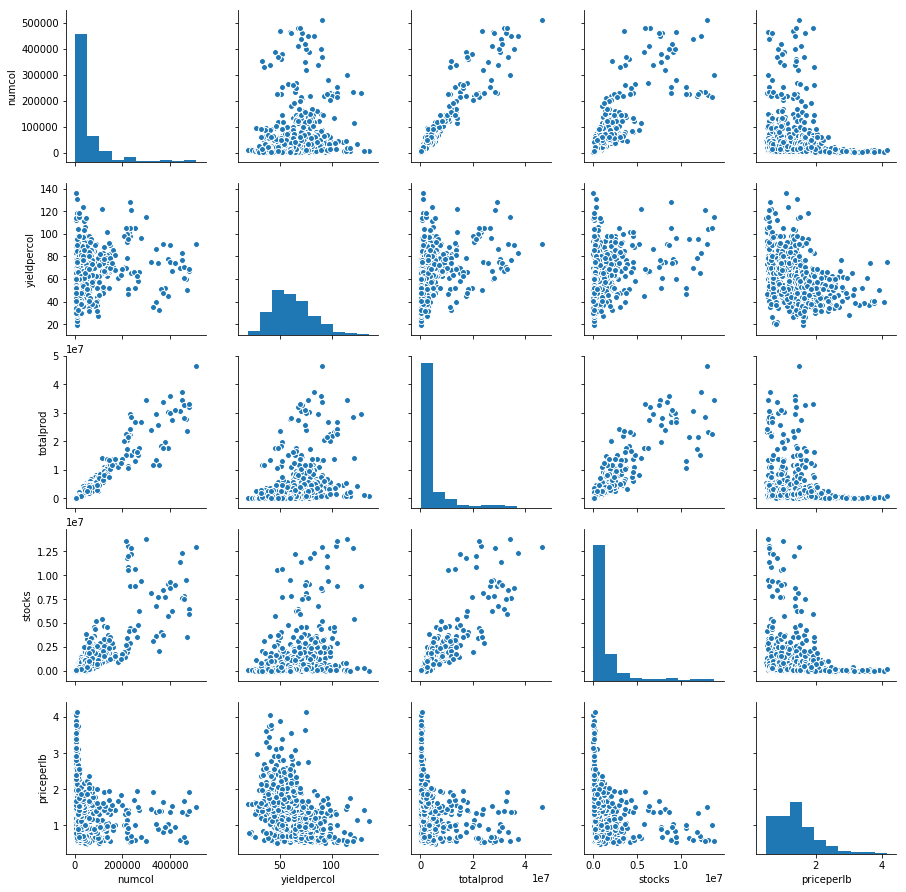

In [54]:
sns.pairplot(df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb']])
plt.show()

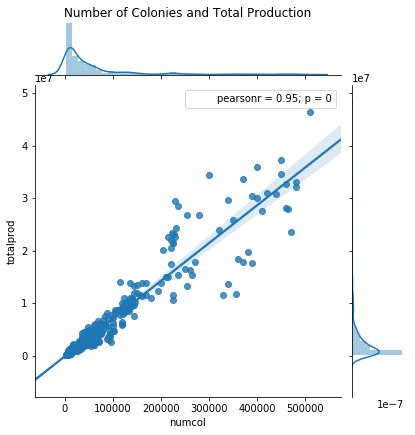

In [57]:
plt.figure(figsize=(8,8))
sns.jointplot(y="totalprod", x="numcol",kind="reg", data=df)
plt.title('Number of Colonies and Total Production', y=1.2)
plt.show()

# The Problem

Honey production in the United States has been gradually declining, causing the price of honey to greatly increase, and forcing the country to be more reliant on importing honey. What's more alarming is that this is related to a phenomenon known as 'colony collapse disorder' where there are not enough worker bees to sustain the hive and it collapses. This could have far greater consequences than just the price of honey if it continues. It is suspected to be tied to the use of a group of pesticides known as neonicotinoids. 

https://en.wikipedia.org/wiki/Colony_collapse_disorder

To counter this trend, we need to identify the cause of the colony collapse. Since it is suspected to be be connected to neonicotinoids, discontinuing the use of these pesticides in the bees' environment will determine if that is the cause of the problem. 

# Experimental Design

**Hypothesis:** Discontinuing the use of neonicotinoids in the bees' environment will reduce the rate of colony collapse disorder. 

**Sample:** Throughout the country, 100 honey farms will be randomly selected to be designated neonicotinoids free zones. The use of neonicotinoids will be prohibited for an area of 15 miles surrounding the farm. Each farm selected will have at least 2000 colonies so the total sample size will be at least 200,000 colonies. Additionally, 100 honey farms will be randomly selected as a control group. The bee population will be monitored at these farms throughout the course of the experiment, but no extra rules regarding pesticides will be put in place at these locations. The control group farms will also have at least 2000 colonies.

# Rollout Plan

